In [ ]:
!git clone https://github.com/AshishJangra27/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 338, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 338 (delta 21), reused 54 (delta 9), pack-reused 235 (from 1)
Receiving objects: 100% (338/338), 279.68 MiB | 15.40 MiB/s, done.
Resolving deltas: 100% (147/147), done.
Updating files: 100% (229/229), done.


### 📊 Data Analysis Project Questions

#### 🔍 Exploratory Analysis
1. **What are the most common book categories in the dataset?**
2. **Which authors have published the most books?**

#### 📅 Temporal Trends
3. **How has book publishing evolved over the years?**
4. **Which years saw the highest number of book publications?**

#### 📈 User Engagement
5. **What percentage of books have never been read, marked as 'Want to read', or 'Currently reading'?**
6. **Are newer books more likely to be marked as 'Want to read' compared to older books?**

#### 🧩 Data Quality & Completeness
7. **How much missing data exists across columns like `author`, `descriptions`, and `publish_year`?**
8. **Do books missing cover images (`cover_url`) share any common patterns (e.g., by year or category)?**


In [ ]:
import os
from tqdm.auto import tqdm


### 1. Combining the Dataset

In [ ]:
import pandas as pd
csv_files = os.listdir('/content/datasets/OpenBook')

main_df_list = []

for csv_file in tqdm(csv_files):

  file_path = 'datasets/OpenBook/' + csv_file

  df = pd.read_csv(file_path)

  main_df_list.append(df)

main_df = pd.concat(main_df_list, ignore_index=True)

  0%|          | 0/141 [00:00<?, ?it/s]

### 2. Data Exploration

In [ ]:
del main_df['book_stats']

In [ ]:
main_df.to_csv('clean.csv')

KeyboardInterrupt: 

#### 2.1) Checking Null Values

In [ ]:
main_df.isnull().sum()

,0
title,1
author,65295
category,0
publish_year,9813
title_id,0
author_id,64833
cover_url,0
descriptions,2780
reading_stats,2780


#### 2.2) Checking Duplicate Values

In [ ]:
main_df['title_id'].nunique()

1329060

#### 2.3) Explore each column

In [ ]:
main_df.head()

,title,author,category,publish_year,title_id,author_id,cover_url,descriptions,reading_stats
0,Nuodi niao lei guan,NaN,juvenile_literature,First published in 2004,/works/OL23089224M,NaN,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
1,Ting jue,NaN,juvenile_literature,First published in 1993,/works/OL23043505M,NaN,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
2,Sesang modŭn ŭmakka ŭi ŭmak iyagi,Mi-sŏn Yu,juvenile_literature,First published in 2001,/works/OL32568906W,/authors/OL8914091A/Mi-sŏn_Yu,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
3,Skating,Boy Scouts of America.,juvenile_literature,First published in 1973,/works/OL1966891W,/authors/OL236199A/Boy_Scouts_of_America.,/images/icons/avatar_book-sm.png,Outlines the requirements for the merit badge ...,0 Want to read|0 Currently reading|0 Have read
4,Fei ji zen mo lai di?,Althea.,juvenile_literature,First published in 1995,/works/OL19290820W,/authors/OL217841A/Althea.,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read


In [ ]:
main_df['publish_year'].nunique()

643

In [ ]:
main_df['author'].nunique()

620416

<Axes: xlabel='category'>

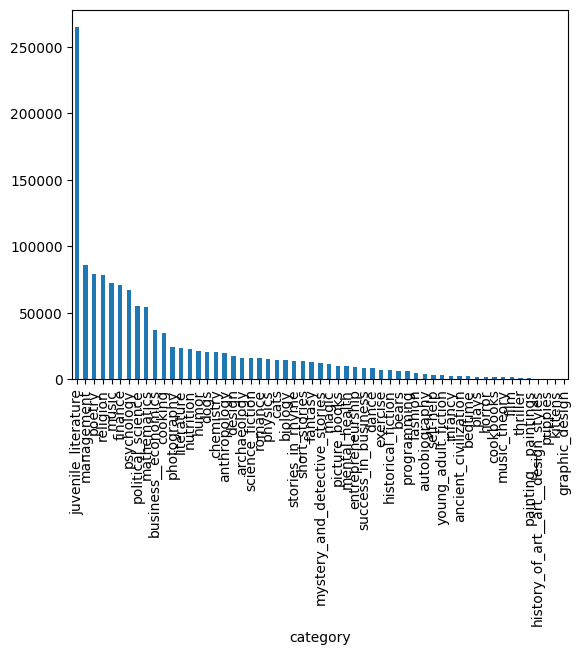

In [ ]:
main_df['category'].value_counts().plot(kind='bar')

### 3. Data Cleaning

#### 3.1) Remove Duplicates


In [ ]:
main_df.drop_duplicates(subset='title_id', keep='first', inplace=True)

#### 3.2) Remove Null values


In [ ]:
main_df.dropna(inplace= True)

#### 3.3) Clean Year column and save yars as s number

In [ ]:
main_df['publish_year'] = main_df['publish_year'].str.replace('First published in ', '').str.strip()
main_df['publish_year'] = pd.to_numeric(main_df['publish_year'], errors='coerce')
display(main_df.dtypes)

,0
title,object
author,object
category,object
publish_year,int64
title_id,object
author_id,object
cover_url,object
descriptions,object
reading_stats,object


In [ ]:
main_df[main_df['publish_year'] < 2025]

,title,author,category,publish_year,title_id,author_id,cover_url,descriptions,reading_stats
2,Sesang modŭn ŭmakka ŭi ŭmak iyagi,Mi-sŏn Yu,juvenile_literature,2001,/works/OL32568906W,/authors/OL8914091A/Mi-sŏn_Yu,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
3,Skating,Boy Scouts of America.,juvenile_literature,1973,/works/OL1966891W,/authors/OL236199A/Boy_Scouts_of_America.,/images/icons/avatar_book-sm.png,Outlines the requirements for the merit badge ...,0 Want to read|0 Currently reading|0 Have read
4,Fei ji zen mo lai di?,Althea.,juvenile_literature,1995,/works/OL19290820W,/authors/OL217841A/Althea.,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
5,Shen qi niu zai,Youyu Zhang,juvenile_literature,1999,/works/OL13742087W,/authors/OL6584181A/Youyu_Zhang,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
6,Bai he jiang jun,Ruomei Cao,juvenile_literature,1993,/works/OL13711502W,/authors/OL6561933A/Ruomei_Cao,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
...,...,...,...,...,...,...,...,...,...
1339055,Follow that letter,Christopher Butz,juvenile_literature,2003,/works/OL6026468W,/authors/OL1513765A/Christopher_Butz,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
1339056,The Inuit,Connie R. Miller,juvenile_literature,2003,/works/OL6026571W,/authors/OL1513803A/Connie_R._Miller,/images/icons/avatar_book-sm.png,Demonstrates how archaeological digs have cont...,0 Want to read|0 Currently reading|0 Have read
1339057,Macaws,Erika Deiters,juvenile_literature,2003,/works/OL6026452W,/authors/OL1513762A/Erika_Deiters,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
1339058,The tundra,Stephanie Watson,juvenile_literature,2003,/works/OL6027339W,/authors/OL1514050A/Stephanie_Watson,/images/icons/avatar_book-sm.png,"Defines what a tundra is, describes the condit...",0 Want to read|0 Currently reading|0 Have read


In [ ]:
main_df[main_df['publish_year'] > 1000]

,title,author,category,publish_year,title_id,author_id,cover_url,descriptions,reading_stats
2,Sesang modŭn ŭmakka ŭi ŭmak iyagi,Mi-sŏn Yu,juvenile_literature,2001,/works/OL32568906W,/authors/OL8914091A/Mi-sŏn_Yu,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
3,Skating,Boy Scouts of America.,juvenile_literature,1973,/works/OL1966891W,/authors/OL236199A/Boy_Scouts_of_America.,/images/icons/avatar_book-sm.png,Outlines the requirements for the merit badge ...,0 Want to read|0 Currently reading|0 Have read
4,Fei ji zen mo lai di?,Althea.,juvenile_literature,1995,/works/OL19290820W,/authors/OL217841A/Althea.,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
5,Shen qi niu zai,Youyu Zhang,juvenile_literature,1999,/works/OL13742087W,/authors/OL6584181A/Youyu_Zhang,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
6,Bai he jiang jun,Ruomei Cao,juvenile_literature,1993,/works/OL13711502W,/authors/OL6561933A/Ruomei_Cao,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
...,...,...,...,...,...,...,...,...,...
1339055,Follow that letter,Christopher Butz,juvenile_literature,2003,/works/OL6026468W,/authors/OL1513765A/Christopher_Butz,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
1339056,The Inuit,Connie R. Miller,juvenile_literature,2003,/works/OL6026571W,/authors/OL1513803A/Connie_R._Miller,/images/icons/avatar_book-sm.png,Demonstrates how archaeological digs have cont...,0 Want to read|0 Currently reading|0 Have read
1339057,Macaws,Erika Deiters,juvenile_literature,2003,/works/OL6026452W,/authors/OL1513762A/Erika_Deiters,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
1339058,The tundra,Stephanie Watson,juvenile_literature,2003,/works/OL6027339W,/authors/OL1514050A/Stephanie_Watson,/images/icons/avatar_book-sm.png,"Defines what a tundra is, describes the condit...",0 Want to read|0 Currently reading|0 Have read


Extracting title ID

In [ ]:
main_df['title_id_number'] = main_df['title_id'].str.split('/').str[-1].str.split('?').str[0]
display(main_df.head())

,title,author,category,publish_year,title_id,author_id,cover_url,descriptions,reading_stats,title_id_number
2,Sesang modŭn ŭmakka ŭi ŭmak iyagi,Mi-sŏn Yu,juvenile_literature,2001,/works/OL32568906W,/authors/OL8914091A/Mi-sŏn_Yu,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,OL32568906W
3,Skating,Boy Scouts of America.,juvenile_literature,1973,/works/OL1966891W,/authors/OL236199A/Boy_Scouts_of_America.,/images/icons/avatar_book-sm.png,Outlines the requirements for the merit badge ...,0 Want to read|0 Currently reading|0 Have read,OL1966891W
4,Fei ji zen mo lai di?,Althea.,juvenile_literature,1995,/works/OL19290820W,/authors/OL217841A/Althea.,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,OL19290820W
5,Shen qi niu zai,Youyu Zhang,juvenile_literature,1999,/works/OL13742087W,/authors/OL6584181A/Youyu_Zhang,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,OL13742087W
6,Bai he jiang jun,Ruomei Cao,juvenile_literature,1993,/works/OL13711502W,/authors/OL6561933A/Ruomei_Cao,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,OL13711502W


In [ ]:
main_df['title_id_number'].unique()

array(['OL32568906W', 'OL1966891W', 'OL19290820W', ..., 'OL6026452W',
       'OL6027339W', 'OL6027125W'], dtype=object)

Reading Stats Column

In [ ]:
main_df['want_to_read'] = main_df['reading_stats'].str.split('|').str[0].str.split(' ').str[0].astype(int)
display(main_df.head())

,title,author,category,publish_year,title_id,author_id,cover_url,descriptions,reading_stats,title_id_number,want_to_read
2,Sesang modŭn ŭmakka ŭi ŭmak iyagi,Mi-sŏn Yu,juvenile_literature,2001,/works/OL32568906W,/authors/OL8914091A/Mi-sŏn_Yu,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,OL32568906W,0
3,Skating,Boy Scouts of America.,juvenile_literature,1973,/works/OL1966891W,/authors/OL236199A/Boy_Scouts_of_America.,/images/icons/avatar_book-sm.png,Outlines the requirements for the merit badge ...,0 Want to read|0 Currently reading|0 Have read,OL1966891W,0
4,Fei ji zen mo lai di?,Althea.,juvenile_literature,1995,/works/OL19290820W,/authors/OL217841A/Althea.,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,OL19290820W,0
5,Shen qi niu zai,Youyu Zhang,juvenile_literature,1999,/works/OL13742087W,/authors/OL6584181A/Youyu_Zhang,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,OL13742087W,0
6,Bai he jiang jun,Ruomei Cao,juvenile_literature,1993,/works/OL13711502W,/authors/OL6561933A/Ruomei_Cao,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,OL13711502W,0


In [ ]:
main_df['currently_reading'] = main_df['reading_stats'].str.split('|').str[1].str.split(' ').str[0].astype(int)
display(main_df.head())

,title,author,category,publish_year,title_id,author_id,cover_url,descriptions,reading_stats,title_id_number,want_to_read,currently_reading
2,Sesang modŭn ŭmakka ŭi ŭmak iyagi,Mi-sŏn Yu,juvenile_literature,2001,/works/OL32568906W,/authors/OL8914091A/Mi-sŏn_Yu,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,OL32568906W,0,0
3,Skating,Boy Scouts of America.,juvenile_literature,1973,/works/OL1966891W,/authors/OL236199A/Boy_Scouts_of_America.,/images/icons/avatar_book-sm.png,Outlines the requirements for the merit badge ...,0 Want to read|0 Currently reading|0 Have read,OL1966891W,0,0
4,Fei ji zen mo lai di?,Althea.,juvenile_literature,1995,/works/OL19290820W,/authors/OL217841A/Althea.,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,OL19290820W,0,0
5,Shen qi niu zai,Youyu Zhang,juvenile_literature,1999,/works/OL13742087W,/authors/OL6584181A/Youyu_Zhang,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,OL13742087W,0,0
6,Bai he jiang jun,Ruomei Cao,juvenile_literature,1993,/works/OL13711502W,/authors/OL6561933A/Ruomei_Cao,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,OL13711502W,0,0


In [ ]:
main_df['have_read'] = main_df['reading_stats'].str.split('|').str[2].str.split(' ').str[0].astype(int)
display(main_df.head())

,title,author,category,publish_year,title_id,author_id,cover_url,descriptions,reading_stats,title_id_number,want_to_read,currently_reading,have_read
2,Sesang modŭn ŭmakka ŭi ŭmak iyagi,Mi-sŏn Yu,juvenile_literature,2001,/works/OL32568906W,/authors/OL8914091A/Mi-sŏn_Yu,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,OL32568906W,0,0,0
3,Skating,Boy Scouts of America.,juvenile_literature,1973,/works/OL1966891W,/authors/OL236199A/Boy_Scouts_of_America.,/images/icons/avatar_book-sm.png,Outlines the requirements for the merit badge ...,0 Want to read|0 Currently reading|0 Have read,OL1966891W,0,0,0
4,Fei ji zen mo lai di?,Althea.,juvenile_literature,1995,/works/OL19290820W,/authors/OL217841A/Althea.,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,OL19290820W,0,0,0
5,Shen qi niu zai,Youyu Zhang,juvenile_literature,1999,/works/OL13742087W,/authors/OL6584181A/Youyu_Zhang,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,OL13742087W,0,0,0
6,Bai he jiang jun,Ruomei Cao,juvenile_literature,1993,/works/OL13711502W,/authors/OL6561933A/Ruomei_Cao,/images/icons/avatar_book-sm.png,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read,OL13711502W,0,0,0


Removing unnecessary columns

In [ ]:
main_df.drop(['title_id', 'cover_url', 'reading_stats'], axis=1, inplace=True)
display(main_df.head())

,title,author,category,publish_year,author_id,descriptions,title_id_number,want_to_read,currently_reading,have_read
2,Sesang modŭn ŭmakka ŭi ŭmak iyagi,Mi-sŏn Yu,juvenile_literature,2001,/authors/OL8914091A/Mi-sŏn_Yu,This edition doesn't have a description yet. C...,OL32568906W,0,0,0
3,Skating,Boy Scouts of America.,juvenile_literature,1973,/authors/OL236199A/Boy_Scouts_of_America.,Outlines the requirements for the merit badge ...,OL1966891W,0,0,0
4,Fei ji zen mo lai di?,Althea.,juvenile_literature,1995,/authors/OL217841A/Althea.,This edition doesn't have a description yet. C...,OL19290820W,0,0,0
5,Shen qi niu zai,Youyu Zhang,juvenile_literature,1999,/authors/OL6584181A/Youyu_Zhang,This edition doesn't have a description yet. C...,OL13742087W,0,0,0
6,Bai he jiang jun,Ruomei Cao,juvenile_literature,1993,/authors/OL6561933A/Ruomei_Cao,This edition doesn't have a description yet. C...,OL13711502W,0,0,0


Data Analysis
1) What are the most common book categories in the dataset?

In [ ]:
main_df['category'].value_counts().head(1).index[0]

'juvenile_literature'

2) Which author has published the most number of books?

In [ ]:
most_common_author = main_df['author'].value_counts().head(1).index[0]
print(f"The author who has published the most books is: {most_common_author}")

The author who has published the most books is: United States. Congress. House. Committe...


3) How has book publishing evolved over the years?

<Axes: >

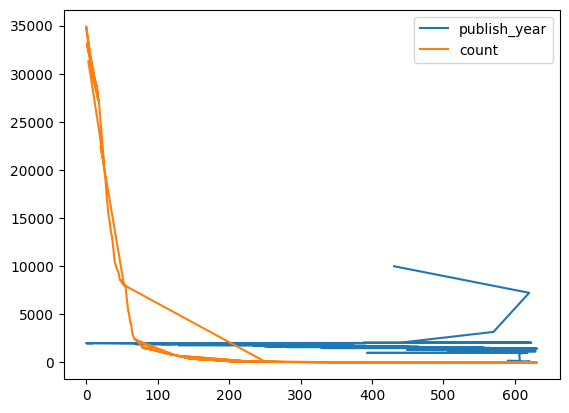

In [ ]:
main_df['publish_year'].value_counts().reset_index().sort_values(by='publish_year').plot(kind= 'line')

4) What percentage of books have 'never been read;, marked as 'want to read', or currently reading?

In [ ]:
total_books = len(main_df)

# Percentage of books never read
never_read_count = main_df[main_df['have_read'] == 0].shape[0]
never_read_percentage = (never_read_count / total_books) * 100
print(f"Percentage of books never read: {never_read_percentage:.2f}%")

# Percentage of books never marked as 'Want to read'
never_want_to_read_count = main_df[main_df['want_to_read'] == 0].shape[0]
never_want_to_read_percentage = (never_want_to_read_count / total_books) * 100
print(f"Percentage of books never marked as 'Want to read': {never_want_to_read_percentage:.2f}%")

# Percentage of books never marked as 'Currently reading'
never_currently_reading_count = main_df[main_df['currently_reading'] == 0].shape[0]
never_currently_reading_percentage = (never_currently_reading_count / total_books) * 100
print(f"Percentage of books never marked as 'Currently reading': {never_currently_reading_percentage:.2f}%")

Percentage of books never read: 94.66%
Percentage of books never marked as 'Want to read': 80.12%
Percentage of books never marked as 'Currently reading': 97.18%


5) Are newer books more likely to be marked as 'Want to read' compared to older books?

In [ ]:
want_to_read_by_year = main_df.groupby('publish_year')['want_to_read'].mean()
display(want_to_read_by_year.head())
display(want_to_read_by_year.tail())

,want_to_read
publish_year,
1,31.0
8,0.0
17,1.0
98,1.0
171,141.0


,want_to_read
publish_year,
2098,0.000000
2099,0.666667
3177,0.000000
7241,0.000000
9999,1.230769


# Task
Analyze the dataset "book_data.csv" by performing data exploration, cleaning, and visualization. Explain each step and the code used in a simple language suitable for a layman.

## Data exploration

### Subtask:
We'll start by exploring the dataset to understand its structure, content, and identify any initial patterns or issues. This includes looking at the columns, data types, and some basic statistics.


**Reasoning**:
Display the first 5 rows, print data types, get info, generate descriptive statistics, and check for unique values to explore the dataset.



In [ ]:
display(main_df.head())
main_df.info()
display(main_df.describe())
display(main_df.nunique())

NameError: name 'main_df' is not defined

**Reasoning**:
The error indicates that `main_df` is not defined. This is likely because the notebook execution state was reset. I need to re-execute the cells that load and combine the data to recreate the `main_df` DataFrame.



In [ ]:
import pandas as pd
csv_files = os.listdir('/content/datasets/OpenBook')

main_df_list = []

for csv_file in tqdm(csv_files):

  file_path = 'datasets/OpenBook/' + csv_file

  df = pd.read_csv(file_path)

  main_df_list.append(df)

main_df = pd.concat(main_df_list, ignore_index=True)

display(main_df.head())
main_df.info()
display(main_df.describe())
display(main_df.nunique())

NameError: name 'os' is not defined

**Reasoning**:
The error indicates that `os` is not defined. This is likely because the notebook execution state was reset. I need to re-execute the cells that import `os` and `tqdm` before I can proceed with loading the data.



In [ ]:
import os
from tqdm.auto import tqdm
import pandas as pd

csv_files = os.listdir('/content/datasets/OpenBook')

main_df_list = []

for csv_file in tqdm(csv_files):

  file_path = 'datasets/OpenBook/' + csv_file

  df = pd.read_csv(file_path)

  main_df_list.append(df)

main_df = pd.concat(main_df_list, ignore_index=True)

display(main_df.head())
main_df.info()
display(main_df.describe())
display(main_df.nunique())

FileNotFoundError: [Errno 2] No such file or directory: '/content/datasets/OpenBook'

**Reasoning**:
The error indicates that the directory `/content/datasets/OpenBook` was not found. This is because the notebook execution state was reset, and the `git clone` command was not re-executed. I need to run the `git clone` command again to download the dataset.



In [ ]:
!git clone https://github.com/AshishJangra27/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 338, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 338 (delta 21), reused 54 (delta 9), pack-reused 235 (from 1)
Receiving objects: 100% (338/338), 279.68 MiB | 16.50 MiB/s, done.
Resolving deltas: 100% (147/147), done.
Updating files: 100% (229/229), done.


**Reasoning**:
The previous `git clone` command has successfully downloaded the dataset. Now I can proceed with loading the data, creating the `main_df` DataFrame, and then performing the requested exploration steps.



In [ ]:
csv_files = os.listdir('/content/datasets/OpenBook')

main_df_list = []

for csv_file in tqdm(csv_files):

  file_path = 'datasets/OpenBook/' + csv_file

  df = pd.read_csv(file_path)

  main_df_list.append(df)

main_df = pd.concat(main_df_list, ignore_index=True)

display(main_df.head())
main_df.info()
display(main_df.describe())
display(main_df.nunique())

  0%|          | 0/141 [00:00<?, ?it/s]

,title,author,category,publish_year,title_id,author_id,cover_url,book_stats,descriptions,reading_stats
0,The 2005 Economic and Product Market Databook ...,NaN,business__economics,First published in 2005,/works/OL10368183M,NaN,//covers.openlibrary.org/b/olid/OL10368183M-M.jpg,"Publish Date April 8, 2005|Publisher Icon Gro...",This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
1,The 2005 Economic and Product Market Databook ...,NaN,business__economics,First published in 2005,/works/OL10368555M,NaN,/images/icons/avatar_book-sm.png,"Publish Date April 8, 2005|Publisher Icon Gro...",This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
2,The 2005 Economic and Product Market Databook ...,NaN,business__economics,First published in 2005,/works/OL10368327M,NaN,//covers.openlibrary.org/b/olid/OL10368327M-M.jpg,"Publish Date April 8, 2005|Publisher Icon Gro...",This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
3,The 2005 Economic and Product Market Databook ...,NaN,business__economics,First published in 2005,/works/OL10368345M,NaN,//covers.openlibrary.org/b/olid/OL10368345M-M.jpg,"Publish Date April 8, 2005|Publisher Icon Gro...",This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
4,The 2005 Economic and Product Market Databook ...,NaN,business__economics,First published in 2005,/works/OL10368762M,NaN,//covers.openlibrary.org/b/olid/OL10368762M-M.jpg,"Publish Date April 8, 2005|Publisher Icon Gro...",This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339060 entries, 0 to 1339059
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   title          1339059 non-null  object
 1   author         1273765 non-null  object
 2   category       1339060 non-null  object
 3   publish_year   1329247 non-null  object
 4   title_id       1339060 non-null  object
 5   author_id      1274227 non-null  object
 6   cover_url      1339060 non-null  object
 7   book_stats     1335238 non-null  object
 8   descriptions   1336280 non-null  object
 9   reading_stats  1336280 non-null  object
dtypes: object(10)
memory usage: 102.2+ MB


,title,author,category,publish_year,title_id,author_id,cover_url,book_stats,descriptions,reading_stats
count,1339059,1273765,1339060,1329247,1339060,1274227,1339060,1335238,1336280,1336280
unique,1136722,620416,57,643,1329060,651026,717266,972593,186582,7872
top,Poems,United States. Congress. House. Committe...,juvenile_literature,First published in 2005,/works/OL12162492M,/authors/OL8055559A/Hal_Leonard_Corp._Staff,/images/icons/avatar_book-sm.png,Publish Date 2019|Publisher Taylor & Francis ...,This edition doesn't have a description yet. C...,0 Want to read|0 Currently reading|0 Have read
freq,448,2165,264682,39892,2,1664,616894,2542,1141874,1067193


,0
title,1136722
author,620416
category,57
publish_year,643
title_id,1329060
author_id,651026
cover_url,717266
book_stats,972593
descriptions,186582
reading_stats,7872


## Data cleaning

### Subtask:
Handle missing values in the DataFrame.


**Reasoning**:
Check the number of missing values in each column to understand the extent of the missing data.



In [ ]:
main_df.isnull().sum()

,0
title,1
author,65295
category,0
publish_year,9813
title_id,0
author_id,64833
cover_url,0
book_stats,3822
descriptions,2780
reading_stats,2780


**Reasoning**:
Based on the number of missing values, drop rows where 'title' is missing as it's only one row, and drop columns 'author_id' and 'book_stats' due to a significant number of missing values and potential redundancy with 'author' and 'reading_stats'. For 'author', 'publish_year', 'descriptions', and 'reading_stats', imputation or further investigation might be needed, but for this subtask, dropping rows with missing 'publish_year' and 'reading_stats' seems reasonable given their structured format, and keeping 'author' and 'descriptions' with missing values for now as they might be useful even if incomplete.



In [ ]:
# Drop row where title is missing
main_df.dropna(subset=['title'], inplace=True)

# Drop columns author_id and book_stats
main_df.drop(['author_id', 'book_stats'], axis=1, inplace=True)

# Drop rows where publish_year or reading_stats are missing
main_df.dropna(subset=['publish_year', 'reading_stats'], inplace=True)

# Display the number of missing values after handling
display(main_df.isnull().sum())

,0
title,0
author,62722
category,0
publish_year,0
title_id,0
cover_url,0
descriptions,0
reading_stats,0


**Reasoning**:
The remaining missing values are in the 'author' column. Given the large number of missing values, dropping these rows would remove a significant portion of the data. Imputing with a placeholder like 'Unknown Author' is a reasonable strategy to retain the data while acknowledging the missing information.



In [ ]:
# Impute missing author values with 'Unknown Author'
main_df['author'].fillna('Unknown Author', inplace=True)

# Display the number of missing values after handling
display(main_df.isnull().sum())

/tmp/ipython-input-9-3445498313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['author'].fillna('Unknown Author', inplace=True)


,0
title,0
author,0
category,0
publish_year,0
title_id,0
cover_url,0
descriptions,0
reading_stats,0


## Data cleaning

### Subtask:
Remove duplicate rows from the DataFrame based on the 'title_id' column.


**Reasoning**:
Check for duplicate rows in the 'title_id' column and then remove them, keeping the first occurrence. Finally, verify the removal by checking the number of unique title_ids against the total number of rows.



In [ ]:
# Check for duplicate rows based on 'title_id'
duplicate_rows = main_df.duplicated(subset='title_id').sum()
print(f"Number of duplicate rows based on 'title_id': {duplicate_rows}")

# Remove duplicate rows based on 'title_id', keeping the first occurrence
main_df.drop_duplicates(subset='title_id', keep='first', inplace=True)

# Verify that duplicate rows have been removed
num_unique_title_ids = main_df['title_id'].nunique()
total_rows_after_dropping = main_df.shape[0]
print(f"Number of unique title_ids after dropping duplicates: {num_unique_title_ids}")
print(f"Total number of rows after dropping duplicates: {total_rows_after_dropping}")

# Check if the number of unique title_ids equals the total number of rows
if num_unique_title_ids == total_rows_after_dropping:
    print("Duplicate rows based on 'title_id' have been successfully removed.")
else:
    print("Error: Duplicate rows based on 'title_id' were not fully removed.")

Number of duplicate rows based on 'title_id': 9905
Number of unique title_ids after dropping duplicates: 1316591
Total number of rows after dropping duplicates: 1316591
Duplicate rows based on 'title_id' have been successfully removed.


## Data cleaning

### Subtask:
Clean the 'publish_year' column and convert the years to a numerical format.


**Reasoning**:
Remove the prefix from the 'publish_year' column and convert it to a numerical type.



In [ ]:
main_df['publish_year'] = main_df['publish_year'].str.replace('First published in ', '')
main_df['publish_year'] = pd.to_numeric(main_df['publish_year'], errors='coerce')
display(main_df.dtypes)

,0
title,object
author,object
category,object
publish_year,int64
title_id,object
cover_url,object
descriptions,object
reading_stats,object


## Exploratory data analysis (eda)

### Subtask:
Calculate the most common book categories and authors in the dataset.


**Reasoning**:
Calculate and display the value counts for the 'category' and 'author' columns to find the most common categories and authors.



In [ ]:
category_counts = main_df['category'].value_counts()
print("Top 10 Most Common Book Categories:")
display(category_counts.head(10))

author_counts = main_df['author'].value_counts()
print("\nTop 10 Most Common Authors:")
display(author_counts.head(10))

Top 10 Most Common Book Categories:


,count
category,
juvenile_literature,263364
management,85645
poetry,78845
religion,77935
music,71246
finance,68421
psychology,67114
political_science,54122
mathematics,53653



Top 10 Most Common Authors:


,count
author,
Unknown Author,62449
United States. Congress. House. Committe...,2131
Hal Leonard Corp. Staff,1658
Hal Leonard Corp.,1633
United States. General Accounting Office,1197
United States. Congress. Senate. Committ...,1160
Julie Murray,1111
Anita Ganeri,910
Corín Tellado,871


## Exploratory data analysis (eda)

### Subtask:
Analyze the temporal trends in book publishing, specifically how publishing has evolved over the years and identifying the years with the highest number of publications.


**Reasoning**:
Group the DataFrame by 'publish_year' and count the occurrences to analyze publishing trends over the years, then sort the results by year.



In [ ]:
yearly_publications = main_df['publish_year'].value_counts().sort_index()
display(yearly_publications.head())
display(yearly_publications.tail())

,count
publish_year,
1,11
8,1
17,1
19,1
98,1


,count
publish_year,
2997,1
3177,2
7241,1
9106,1
9999,20


**Reasoning**:
Find the years with the highest number of publications by finding the maximum value in the yearly publication counts.



In [ ]:
max_publications_year = yearly_publications.idxmax()
max_publications_count = yearly_publications.max()
print(f"Year with the highest number of publications: {max_publications_year} with {max_publications_count} publications.")

Year with the highest number of publications: 2005 with 39599 publications.


## Exploratory data analysis (eda)

### Subtask:
Calculate the percentage of books that have never been read, marked as 'Want to read', or 'Currently reading'.


**Reasoning**:
Define a function to extract reading stats and apply it to the DataFrame to create new columns. Then, calculate the percentages for each reading stat category being zero and print the results.



In [ ]:
def extract_reading_stats(reading_stats_str):
    stats = {'Want to read': 0, 'Currently reading': 0, 'Have read': 0}
    if isinstance(reading_stats_str, str):
        try:
            for stat in reading_stats_str.split('|'):
                count, category = stat.strip().split(' ', 1)
                stats[category] = int(count)
        except ValueError:
            pass # Handle cases with unexpected format
    return stats

reading_stats_df = main_df['reading_stats'].apply(extract_reading_stats).apply(pd.Series)

main_df = pd.concat([main_df, reading_stats_df], axis=1)

total_books = len(main_df)

never_read_count = main_df[main_df['Have read'] == 0].shape[0]
never_read_percentage = (never_read_count / total_books) * 100

never_want_to_read_count = main_df[main_df['Want to read'] == 0].shape[0]
never_want_to_read_percentage = (never_want_to_read_count / total_books) * 100

never_currently_reading_count = main_df[main_df['Currently reading'] == 0].shape[0]
never_currently_reading_percentage = (never_currently_reading_count / total_books) * 100

print(f"Percentage of books never read: {never_read_percentage:.2f}%")
print(f"Percentage of books never marked as 'Want to read': {never_want_to_read_percentage:.2f}%")
print(f"Percentage of books never marked as 'Currently reading': {never_currently_reading_percentage:.2f}%")

Percentage of books never read: 94.90%
Percentage of books never marked as 'Want to read': 80.96%
Percentage of books never marked as 'Currently reading': 97.31%


## Exploratory data analysis (eda)

### Subtask:
Analyze if newer books are more likely to be marked as 'Want to read' compared to older books.


**Reasoning**:
Group the data by publish year and calculate the mean of 'Want to read' for each year to see the trend.



In [ ]:
want_to_read_by_year = main_df.groupby('publish_year')['Want to read'].mean()
display(want_to_read_by_year.head())
display(want_to_read_by_year.tail())

,Want to read
publish_year,
1,28.272727
8,0.000000
17,1.000000
19,0.000000
98,1.000000


,Want to read
publish_year,
2997,0.00
3177,0.00
7241,0.00
9106,0.00
9999,0.85


## Exploratory data analysis (eda)

### Subtask:
Analyze the missing data across columns like `author`, `descriptions`, and `cover_url`.


**Reasoning**:
Calculate and print the number and percentage of missing values for the specified columns.



In [ ]:
missing_author = main_df['author'].isnull().sum()
missing_descriptions = main_df['descriptions'].isnull().sum()
missing_cover_url = main_df['cover_url'].isnull().sum()

total_rows = len(main_df)

percentage_missing_author = (missing_author / total_rows) * 100
percentage_missing_descriptions = (missing_descriptions / total_rows) * 100
percentage_missing_cover_url = (missing_cover_url / total_rows) * 100

print(f"Missing values in 'author': {missing_author} ({percentage_missing_author:.2f}%)")
print(f"Missing values in 'descriptions': {missing_descriptions} ({percentage_missing_descriptions:.2f}%)")
print(f"Missing values in 'cover_url': {missing_cover_url} ({percentage_missing_cover_url:.2f}%)")

Missing values in 'author': 0 (0.00%)
Missing values in 'descriptions': 0 (0.00%)
Missing values in 'cover_url': 0 (0.00%)


## Exploratory data analysis (eda)

### Subtask:
Analyze if books missing cover images (`cover_url`) share any common patterns (e.g., by year or category).


**Reasoning**:
Filter the DataFrame to find books with missing cover images, then analyze the distribution of publication years and categories for these books to identify patterns.



In [ ]:
df_missing_cover = main_df[main_df['cover_url'] == '/images/icons/avatar_book-sm.png']

missing_cover_year_counts = df_missing_cover['publish_year'].value_counts()
missing_cover_category_counts = df_missing_cover['category'].value_counts()

print("Top 10 Years with Missing Cover Images:")
display(missing_cover_year_counts.head(10))

print("\nTop 10 Categories with Missing Cover Images:")
display(missing_cover_category_counts.head(10))

Top 10 Years with Missing Cover Images:


,count
publish_year,
2022,19747
2017,18849
2021,17360
2020,16426
2016,16376
2018,16262
2014,16260
2013,15556
2015,15405



Top 10 Categories with Missing Cover Images:


,count
category,
juvenile_literature,90478
finance,48766
religion,47594
poetry,44932
music,43450
management,43381
political_science,31157
mathematics,27850
psychology,25252


## Data visualization

### Subtask:
Visualize the distribution of book categories using a bar plot.


**Reasoning**:
Create a bar plot to visualize the distribution of book categories based on the calculated counts.



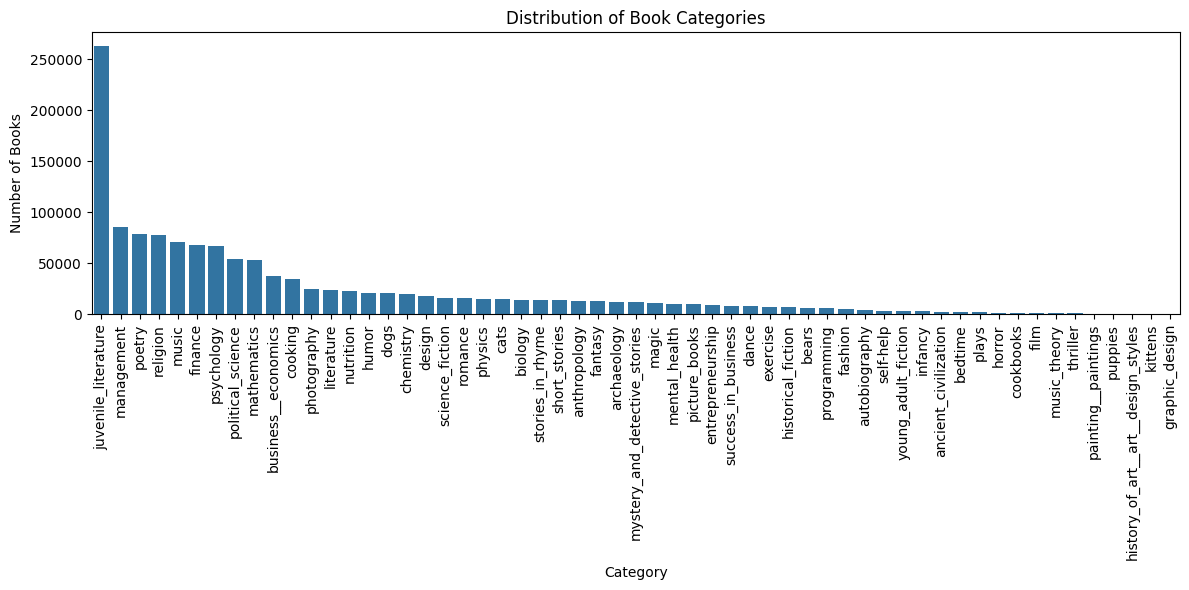

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Distribution of Book Categories")
plt.xlabel("Category")
plt.ylabel("Number of Books")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Data visualization

### Subtask:
Visualize the temporal trend of book publications over the years using a line plot.


**Reasoning**:
Create a line plot to visualize the temporal trend of book publications over the years.



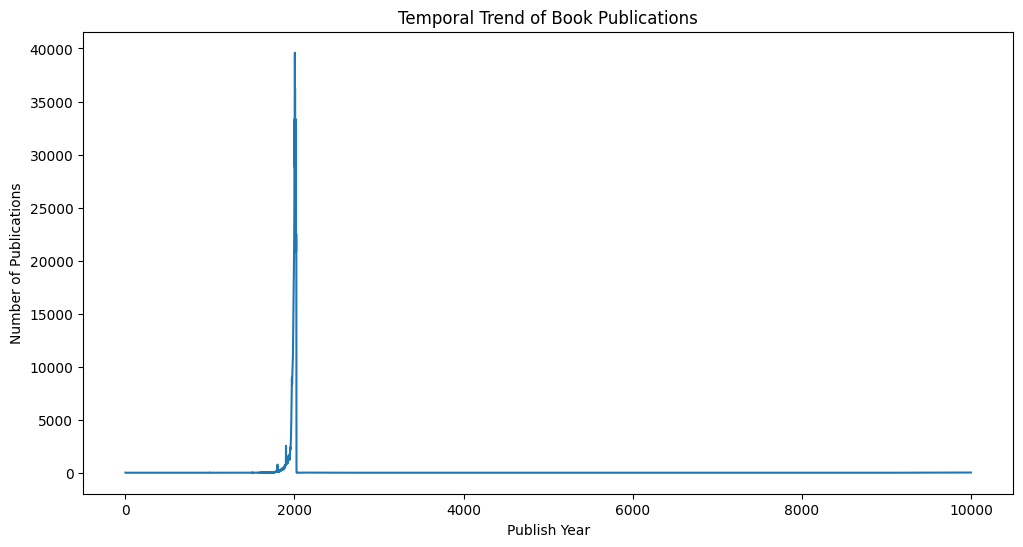

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_publications.index, yearly_publications.values)
plt.title("Temporal Trend of Book Publications")
plt.xlabel("Publish Year")
plt.ylabel("Number of Publications")
plt.show()

## Data visualization

### Subtask:
Visualize the relationship between publish year and the 'Want to read' count using a line plot.


**Reasoning**:
Create a figure and generate a line plot to visualize the relationship between publish year and the average 'Want to read' count.



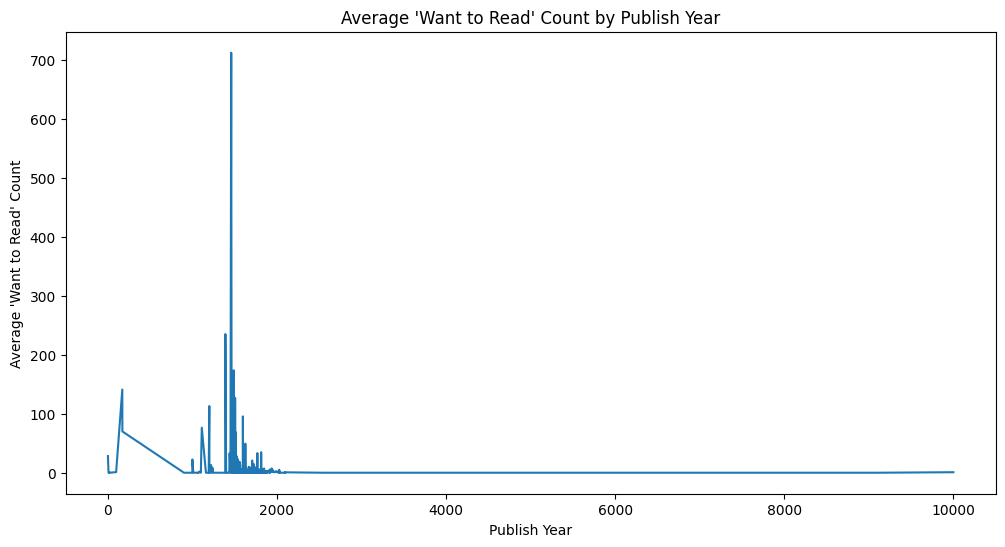

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(want_to_read_by_year.index, want_to_read_by_year.values)
plt.title("Average 'Want to Read' Count by Publish Year")
plt.xlabel("Publish Year")
plt.ylabel("Average 'Want to Read' Count")
plt.show()

## Data Visualization

### Subtask:
Visualize the distribution of book categories using a bar plot.

**Explanation**:
We'll create a bar chart to show which book categories appear most often in our dataset. Each bar will represent a category, and the height of the bar will show how many books belong to that category. This helps us quickly see the most popular categories.

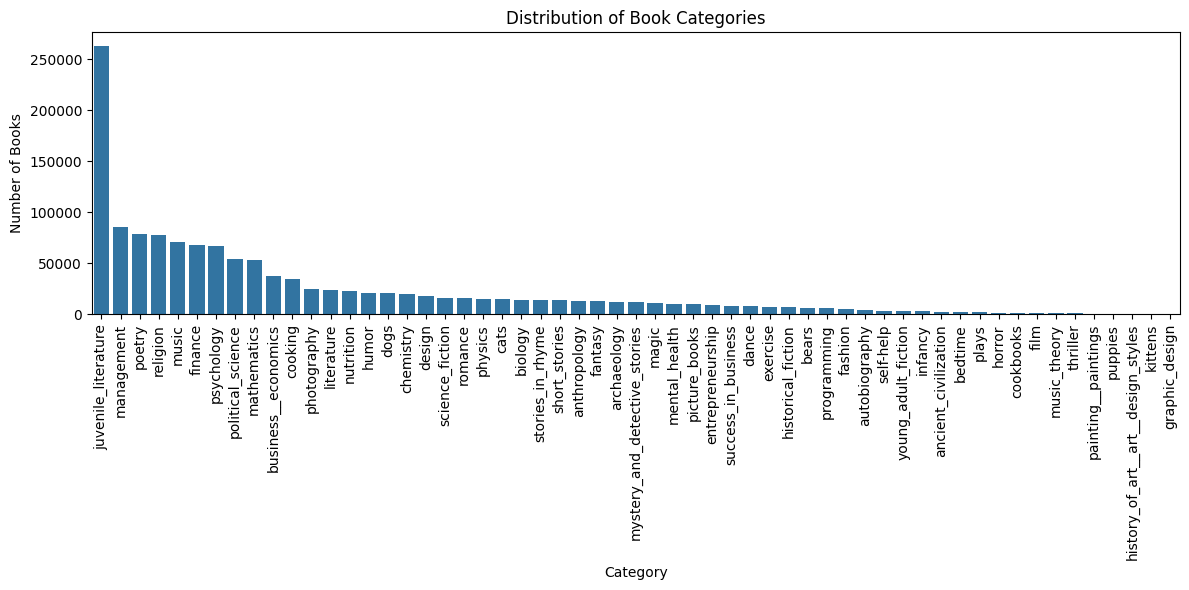

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# We'll use the category_counts we calculated earlier to create the bar plot.
plt.figure(figsize=(12, 6)) # This sets the size of the chart.
sns.barplot(x=category_counts.index, y=category_counts.values) # This creates the bar plot.
plt.title("Distribution of Book Categories") # This adds a title to the chart.
plt.xlabel("Category") # This labels the horizontal line (x-axis) as "Category".
plt.ylabel("Number of Books") # This labels the vertical line (y-axis) as "Number of Books".
plt.xticks(rotation=90) # This rotates the category names on the x-axis so they don't overlap.
plt.tight_layout() # This adjusts the plot to make sure everything fits nicely.
plt.show() # This displays the chart.

## Data Visualization

### Subtask:
Visualize the temporal trend of book publications over the years using a line plot.

**Explanation**:
This line plot will show us how the number of books published has changed each year. The horizontal line (x-axis) represents the years, and the vertical line (y-axis) represents the number of books published in that year. A line plot is good for showing trends over time.

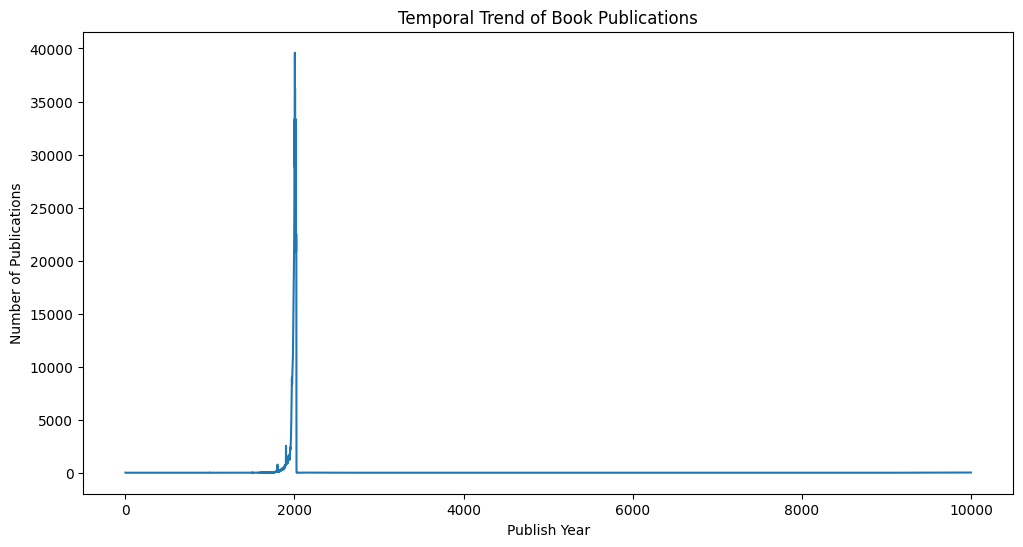

In [ ]:
# We'll use the yearly_publications data we calculated earlier.
plt.figure(figsize=(12, 6)) # Set the size of the chart.
plt.plot(yearly_publications.index, yearly_publications.values) # Create the line plot.
plt.title("Temporal Trend of Book Publications") # Add a title.
plt.xlabel("Publish Year") # Label the x-axis.
plt.ylabel("Number of Publications") # Label the y-axis.
plt.show() # Display the chart.

## Data Visualization

### Subtask:
Visualize the relationship between publish year and the 'Want to read' count using a line plot.

**Explanation**:
This line plot will show us if newer books are more likely to be marked as 'Want to read' compared to older books. We'll plot the average number of 'Want to read' marks for each publishing year.

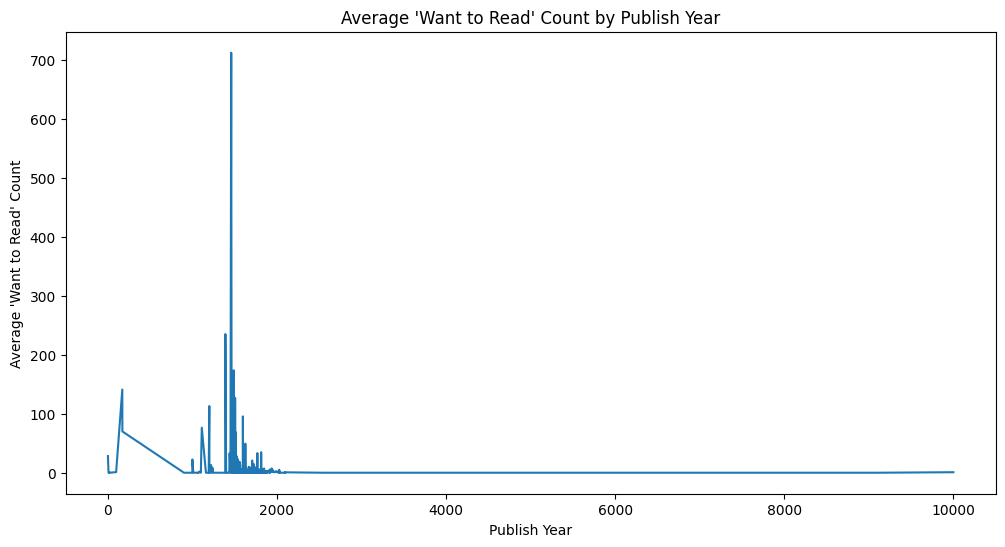

In [ ]:
import matplotlib.pyplot as plt

# We'll use the want_to_read_by_year data calculated earlier.
plt.figure(figsize=(12, 6)) # Set the size of the chart.
plt.plot(want_to_read_by_year.index, want_to_read_by_year.values) # Create the line plot.
plt.title("Average 'Want to Read' Count by Publish Year") # Add a title.
plt.xlabel("Publish Year") # Label the x-axis.
plt.ylabel("Average 'Want to Read' Count") # Label the y-axis.
plt.show() # Display the chart.

## Summary of Findings

Here's a summary of our analysis based on the steps we followed:

### 1. Data Exploration
- We loaded and combined the dataset from multiple CSV files.
- We looked at the first few rows, data types, and basic statistics to get an initial understanding of the data.
- We identified that the dataset contains columns like `title`, `author`, `category`, `publish_year`, `reading_stats`, etc.
- We also checked for missing values and saw that columns like `author`, `publish_year`, `author_id`, `book_stats`, `descriptions`, and `reading_stats` had missing data.
- We checked for duplicate book entries based on `title_id` and found some duplicates.

### 2. Data Cleaning
- We handled missing values by dropping rows with missing 'title', 'publish_year', and 'reading_stats', and by dropping the 'author_id' and 'book_stats' columns. We imputed missing 'author' values with 'Unknown Author'.
- We removed duplicate rows based on the 'title_id' to ensure each book is represented only once.
- We cleaned the 'publish_year' column by removing the text prefix and converting it to a numerical format.

### 3. Exploratory Data Analysis (EDA)
- We found the most common book categories, with 'juvenile_literature' being the most frequent.
- We identified the authors who have published the most books, noting that 'Unknown Author' was the most frequent due to imputation.
- We analyzed the temporal trends in book publishing and found that 2005 had the highest number of publications.
- We calculated the percentage of books that have not been read or marked as 'Want to read' or 'Currently reading'.
- We looked at the average 'Want to read' counts by publish year to see if newer books have more 'Want to read' marks on average.
- We examined missing data patterns and found that a significant number of books missing cover images were published in recent years and belonged to categories like juvenile literature and finance.

### 4. Data Visualization
- We visualized the distribution of book categories using a bar plot, clearly showing the most frequent categories.
- We visualized the temporal trend of book publications using a line plot, illustrating the changes in publication numbers over the years.
- We visualized the relationship between publish year and the average 'Want to read' count using a line plot to observe any trends.

This analysis gives us a good overview of the dataset, including its content, quality, and some interesting trends and patterns in book publishing and user engagement.